# CHAPTER 1: DEFINITION OF THE PROBLEM STATEMENT AND EXPLORATORY DATE ANALYSIS

## INTRODUCTION TO `JAMBOREE EDUCTION PRIVATE LIMETED`

> `Jamboree` is India's leading and oldest institute for study abroad test preparation and admission counselling. It offers comprehensive classroom preparation programs for tests such as `GMAT, GRE, SAT, TOEFT and IELTS`. Jamboree has 35 centers located in India and Nepal. Each centre follows a uniform curriculum with same outstanding teaching standards & syllabus.

> `Jamboree` was founded by the `Akrita Kalra` in the spring of 1993. `Vineet Gupta` is the Director and Operational head of the company.

## DEFINITION OF PROBLEM

> Jamboree has helped thousands of students who wants to make it to top colleges abroad. Be it GMAT, GRE or SAT, Their unique problem-solving methods ensure maximum scores with minimum effort.

> They recently launched a feature where students/ learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

> This analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.

> This analysis also predicts one's chances of admission given the rest of the variables. 

## IMPORTING THE LIBRARIES AND DATASET

### Importing all the required libraries

In [787]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations,permutations
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats

### Importing the Dataset

In [702]:
jamboree = pd.read_csv('Jamboree_admission.csv')

In [703]:
# top 10 rows of the dataset
jamboree.head(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
5         1              0.90  
6         1              0.75  
7         0              0.68  
8         0              0.50  
9         0              0.45

In [704]:
# Deleting the space in LOR_ and Chance of Admit_ to avoid Key error
jamboree.rename(columns = {"LOR ":"LOR","Chance of Admit ":"Chance of Admit"},inplace = True)

### Description regarding each column of the dataset

|Column name|Description|
|-----------|-----------|
|**Serial No.**|Unique row ID representing unique student|
|**GRE Score**|Score obtained by the student in GRE exam out of 340|
|**TOEFL Score**|Score obtained by the student in TOEFL exam out of 120|
|**University Rating**|Student's Undergraduate University/College rating out of 5, where 5 being the Best, 1 being the worst|
|**SOP**|Strength of Statement of Purpose calculated by some empirical formulae out of 5.0, where 5.0 being the Best, 1.0 being the worst|
|**LOR_**|Strength of Letter of Recommendation calculated by some empirical formulae out of 5.0, where 5.0 being the Best, 1.0 being the worst|
|**CGPA**|Student's Undergraduate Cumulative Grade Point Average out of 10 points|
|**Research**|Boolean column where 1 represents that student has Research Experience and 0 represents that student does not have Research Experience|
|**Chance of Admit_**|Probability of getting admission in IVY League colleges calculated using some empirical formulae consisting all the above columns(range - 0 to 1), where 1 being 100% sure of admission and 0 being 100% sure of no admission|

## ANALYSING BASIC METRICS OF DATASET

### Shape of the data

In [705]:
print(f"Number of rows in the dataset = {jamboree.shape[0]}")
print(f"Number of columns in the dataset = {jamboree.shape[1]}")

Number of rows in the dataset = 500
Number of columns in the dataset = 9


### Datatypes of all the attributes

In [706]:
jamboree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Missing value or Null Value Detection

In [707]:
jamboree.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Descriptive Statistics regarding each column of dataset

In [708]:
jamboree.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

### Creating Separate column names' lists for categorical, numerical and Target

In [709]:
cat_cols = ['University Rating','SOP','LOR','Research']
num_cols = ['GRE Score','TOEFL Score','CGPA','Chance of Admit']
target = 'Chance of Admit'

In [710]:
jamboree.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Conversion of Cat_cols to Categorical data type

In [711]:
for i in cat_cols:
    jamboree[i] = pd.Categorical(jamboree[i],ordered = True)

In [712]:
jamboree.dtypes

Serial No.              int64
GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

### Number of unique values in each column of given dataset

In [713]:
for i in jamboree.columns:
    print(i,":",jamboree[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2
Chance of Admit : 61


### Unique values of columns whose nunique < 10

In [714]:
for i in jamboree.columns:
    if jamboree[i].nunique() < 10:
        print(i,sorted(jamboree[i].unique()),"",sep = "\n")

University Rating
[1, 2, 3, 4, 5]

SOP
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

LOR
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

Research
[0, 1]



### Range of values for all numerical columns

In [715]:
for i in num_cols:
    print(f"Maximum of {i}",jamboree[i].max())
    print(f"Minimum of {i}",jamboree[i].min())
    print()

Maximum of GRE Score 340
Minimum of GRE Score 290

Maximum of TOEFL Score 120
Minimum of TOEFL Score 92

Maximum of CGPA 9.92
Minimum of CGPA 6.8

Maximum of Chance of Admit 0.97
Minimum of Chance of Admit 0.34



In [716]:
print(f"Maximum of Chance of Admit ",jamboree[target].max())
print(f"Minimum of Chance of Admit ",jamboree[target].min())

Maximum of Chance of Admit  0.97
Minimum of Chance of Admit  0.34


### Value counts of all categorical columns

In [717]:
for i in cat_cols:
    print("Value Counts of {}".format(i),end="\n\n")
    print(jamboree[i].value_counts(),end="\n\n")

Value Counts of University Rating

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Value Counts of SOP

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

Value Counts of LOR

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

Value Counts of Research

1    280
0    220
Name: Research, dtype: int64



### Observations:

> No null values in the dataset

> No Duplicated rows in the dataset

> Serial No., University Rating, SOP, LOR , Research should be categorical type of variables as they have discrete and finite values

> GRE Score, TOEFL Score, CGPA should be numerical type of variables as they have continuous type of values.

> Chance of Admit is the Target column in this analysis.

> University rating range is from 1 to 5 with step size = 1

> Statement of Purpose range is from 1.0 to 5.0 with step size = 0.5

> Letter of Recommendation range is from 1.0 to 5.0 with step size = 0.5

> Research is Boolean type of column with value either 0 (no research) or 1 (Research)

> Range of GRE Score in the given dataset = 290 to 340

> Range of TOEFL Score in the given dataset = 92 to 120

> Range of Student's CGPA in the given dataset = 6.8 to 9.92

> Range of Target column - Chance of Admit in the given dataset = 0.34 to 0.97

> Mean value of GRE Score = 316.472/340, TOEFL Score = 107.192/120, University Rating = 3.114/5, SOP = 3.374/5, LOR = 3.484/5, CGPA = 8.576/10, Research = 0.56/1, Chance of Admit = 0.721/ 1

> Median value of GRE Score = 317/340, TOEFL Score = 107/120, University Rating = 3/5, SOP = 3.5/5, LOR = 3.5/5, CGPA = 8.56/10, Research = 1, Chance of Admit = 0.72/ 1

> Mean and Median values are almost matched for every column

> University ratings quantile values are 1,2,3,4,5. That means equal divisions are made for each University rating 

## UNIVARIATE ANALYSIS (DISTRIBUTION PLOTS OF ALL THE CONTINUOUS VARIABLES, BARPLOTS/COUNTPLOTS OF ALL THE CATEGORICAL VARIABLES)

### Distribution plots for all numerical columns

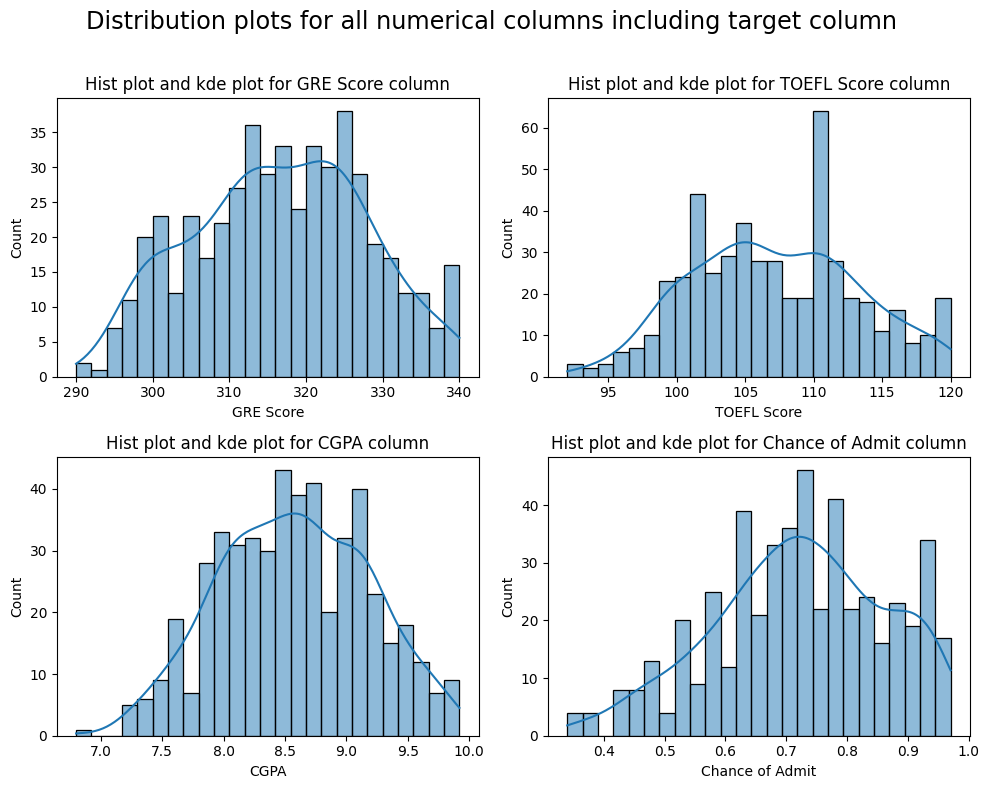

In [718]:
fig = plt.figure(figsize = (10,8))
fig.suptitle("Distribution plots for all numerical columns including target column \n",fontsize = "xx-large" )
k = 1
for i in num_cols:
    plt.subplot(2,2,k)
    plt.title("Hist plot and kde plot for {} column".format(i))
    sns.histplot(data=jamboree, x=i, kde=True,bins = 25)
    # plt.xticks(rotation = 90)
    k = k+1
plt.tight_layout()
plt.show()

### Box plots for all numerical columns

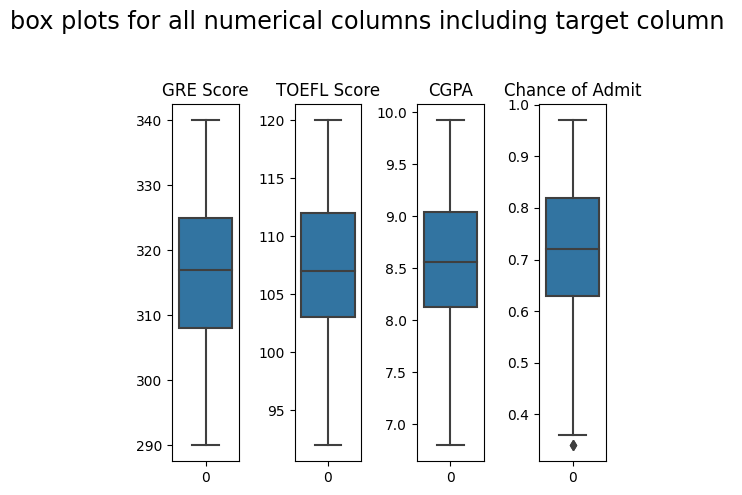

In [719]:
fig = plt.figure(figsize = (5,5))
fig.suptitle("box plots for all numerical columns including target column \n",fontsize = "xx-large" )
k = 1
for i in num_cols:
    plt.subplot(1,4,k)
    plt.title("{}".format(i))
    sns.boxplot(data=jamboree[i])
    k = k+1
plt.tight_layout()
plt.show()

### Count plots for all categorical columns

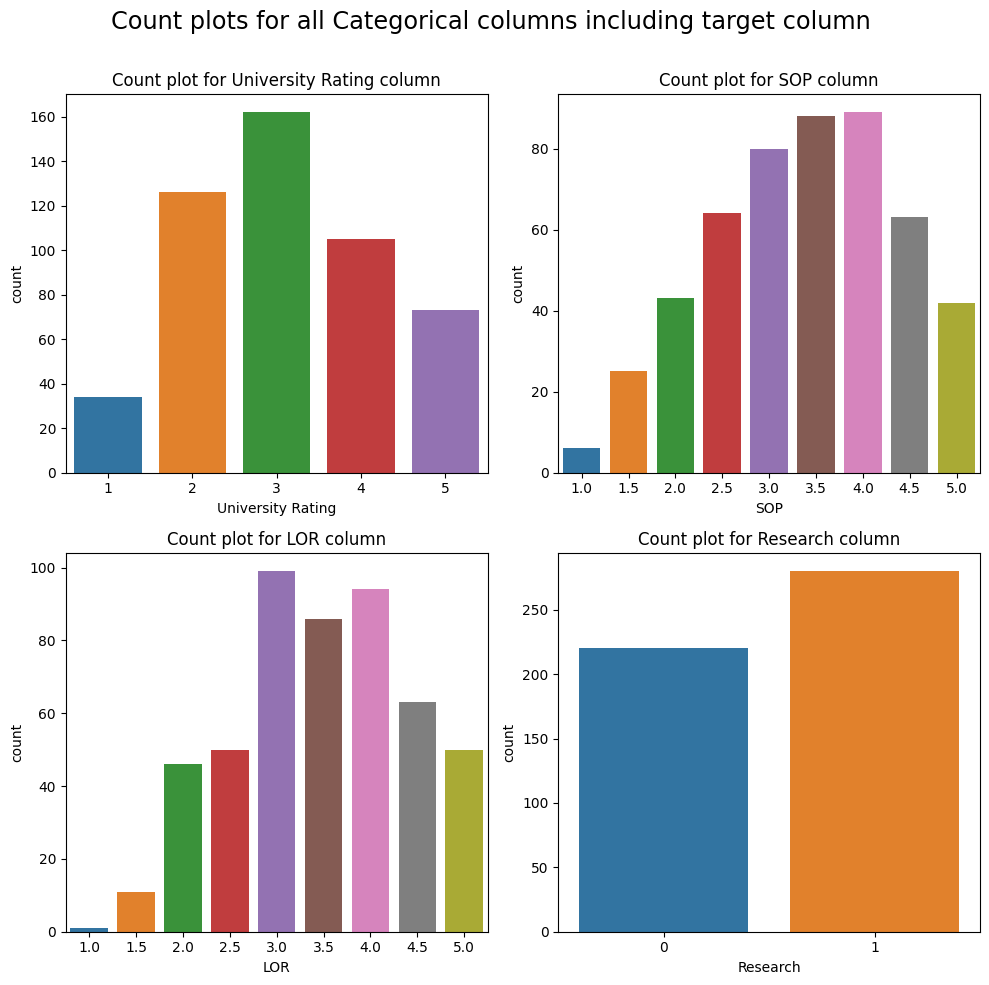

In [720]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Count plots for all Categorical columns including target column \n",fontsize = "xx-large" )
k = 1
for i in cat_cols:
    plt.subplot(2,2,k)
    plt.title("Count plot for {} column".format(i))
    sns.countplot(data=jamboree, x=i)
    # plt.xticks(rotation = 90)
    k = k+1
plt.tight_layout()
plt.show()

### Observations

> GRE Score, TOEFL Score and CGPA are looking like approximate normal distribution

> Chance of Admit is  looking like Right skewed Normal Distribution. May be outliers at lower whisker of Chance of Admit.

> Some outliers may present in Chance of Admit column according to box plots 

## BIVARIATE ANALYSIS (RELATIONSHIPS BETWEEN IMPORTANT VARIABLES SUCH AS WORKDAY AND COUNT, SEASON AND COUNT, WEATHER AND COUNT)

### Categorical Vs Categorical

In [721]:
cat_perm = list(permutations(cat_cols,2))
cat_comb = list(combinations(cat_cols,2))

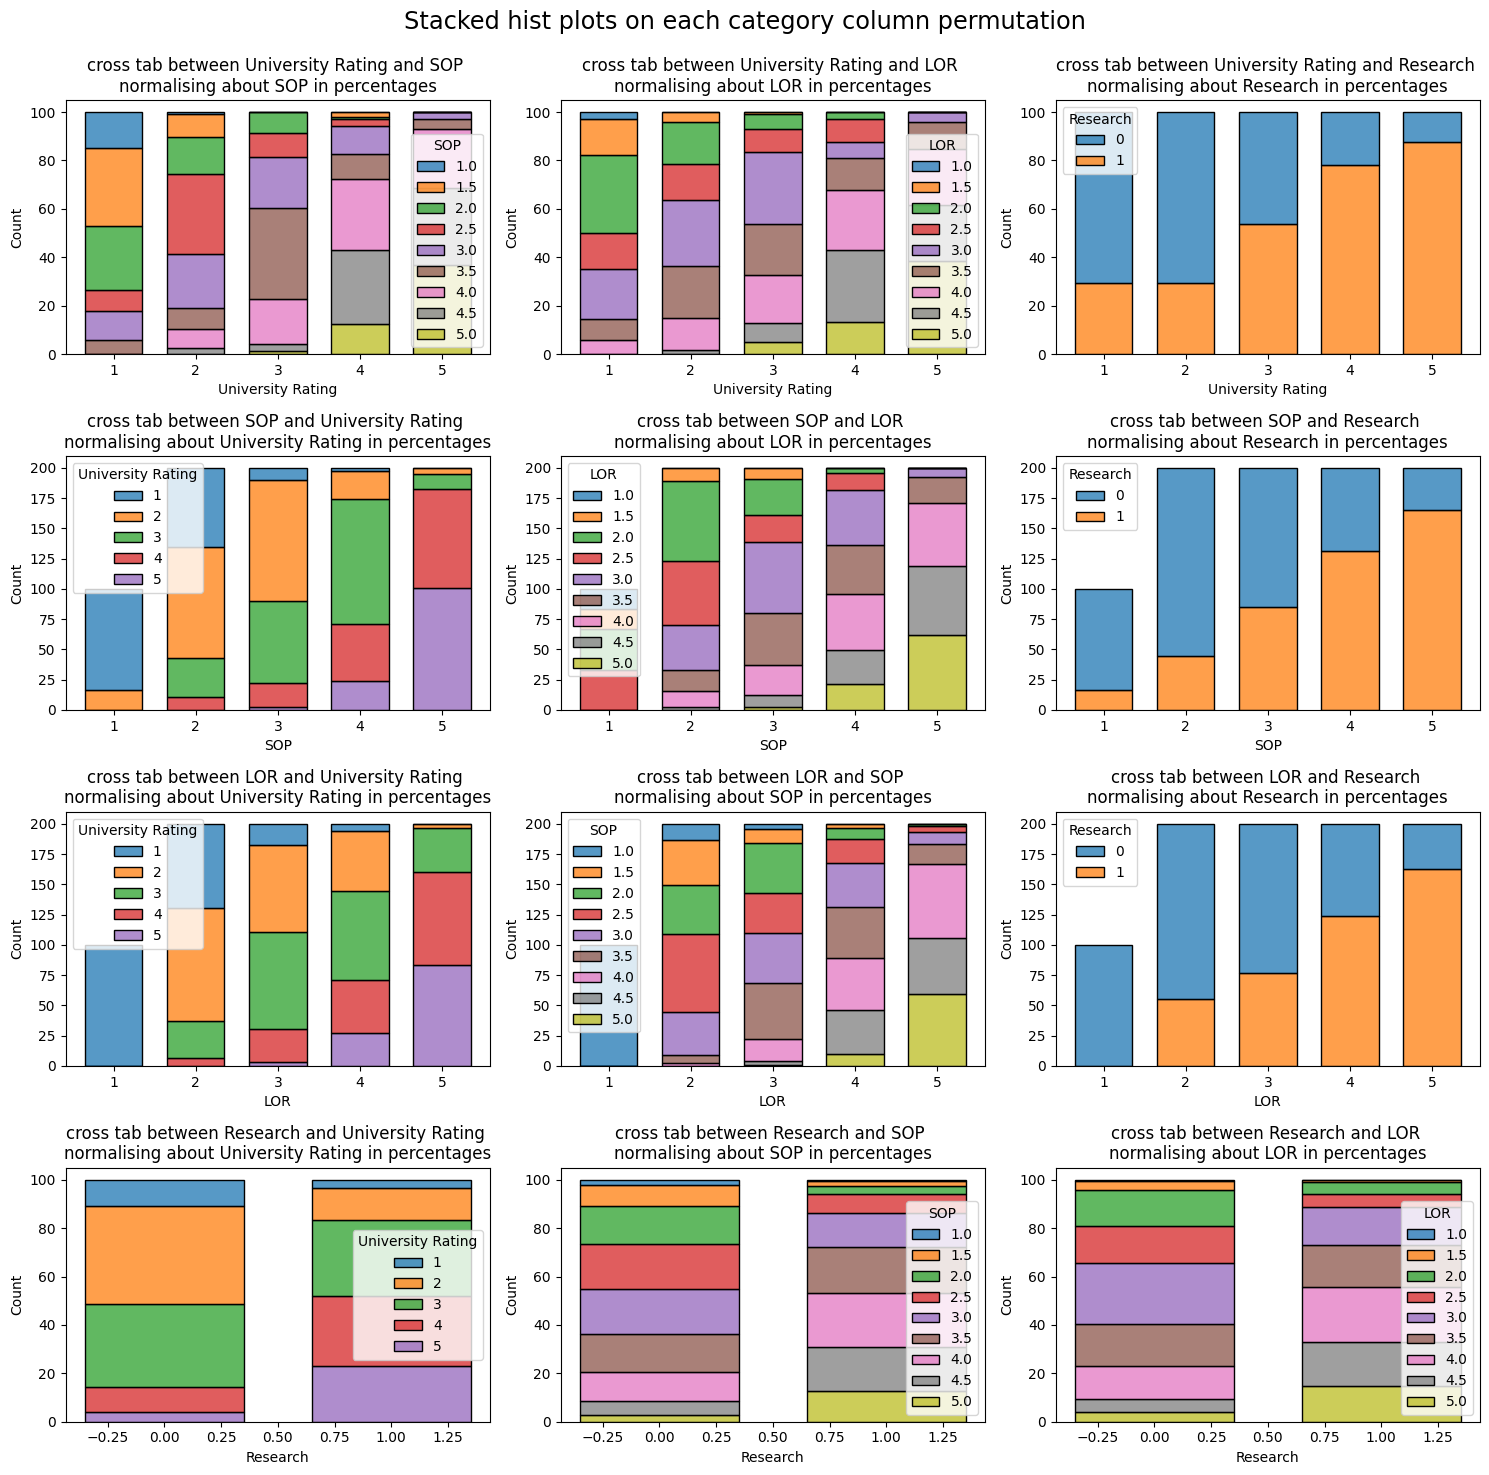

In [722]:
fig = plt.figure(figsize = (15,15))
plt.suptitle("Stacked hist plots on each category column permutation\n",fontsize="xx-large")
k = 1
for p,q in cat_perm:
    plt.subplot(math.ceil(len(cat_perm)/3),3,k)
    plt.title(f"cross tab between {p} and {q} \nnormalising about {q} in percentages")
    k += 1
    plot = jamboree.groupby([p])[q].value_counts(normalize=True).mul(100).reset_index(name='percentage')
    sns.histplot(x = p , hue = q, weights= 'percentage',
                multiple = 'stack',data=plot,shrink = 0.7)
    warnings.filterwarnings('ignore')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
warnings.filterwarnings('ignore')

In [723]:
Cat_Vs_Num = []
for i in range(len(cat_cols)):
    for j in range(len(num_cols)):
        Cat_Vs_Num.append((cat_cols[i], num_cols[j]))
print(Cat_Vs_Num)
print(len(Cat_Vs_Num))


[('University Rating', 'GRE Score'), ('University Rating', 'TOEFL Score'), ('University Rating', 'CGPA'), ('University Rating', 'Chance of Admit'), ('SOP', 'GRE Score'), ('SOP', 'TOEFL Score'), ('SOP', 'CGPA'), ('SOP', 'Chance of Admit'), ('LOR', 'GRE Score'), ('LOR', 'TOEFL Score'), ('LOR', 'CGPA'), ('LOR', 'Chance of Admit'), ('Research', 'GRE Score'), ('Research', 'TOEFL Score'), ('Research', 'CGPA'), ('Research', 'Chance of Admit')]
16


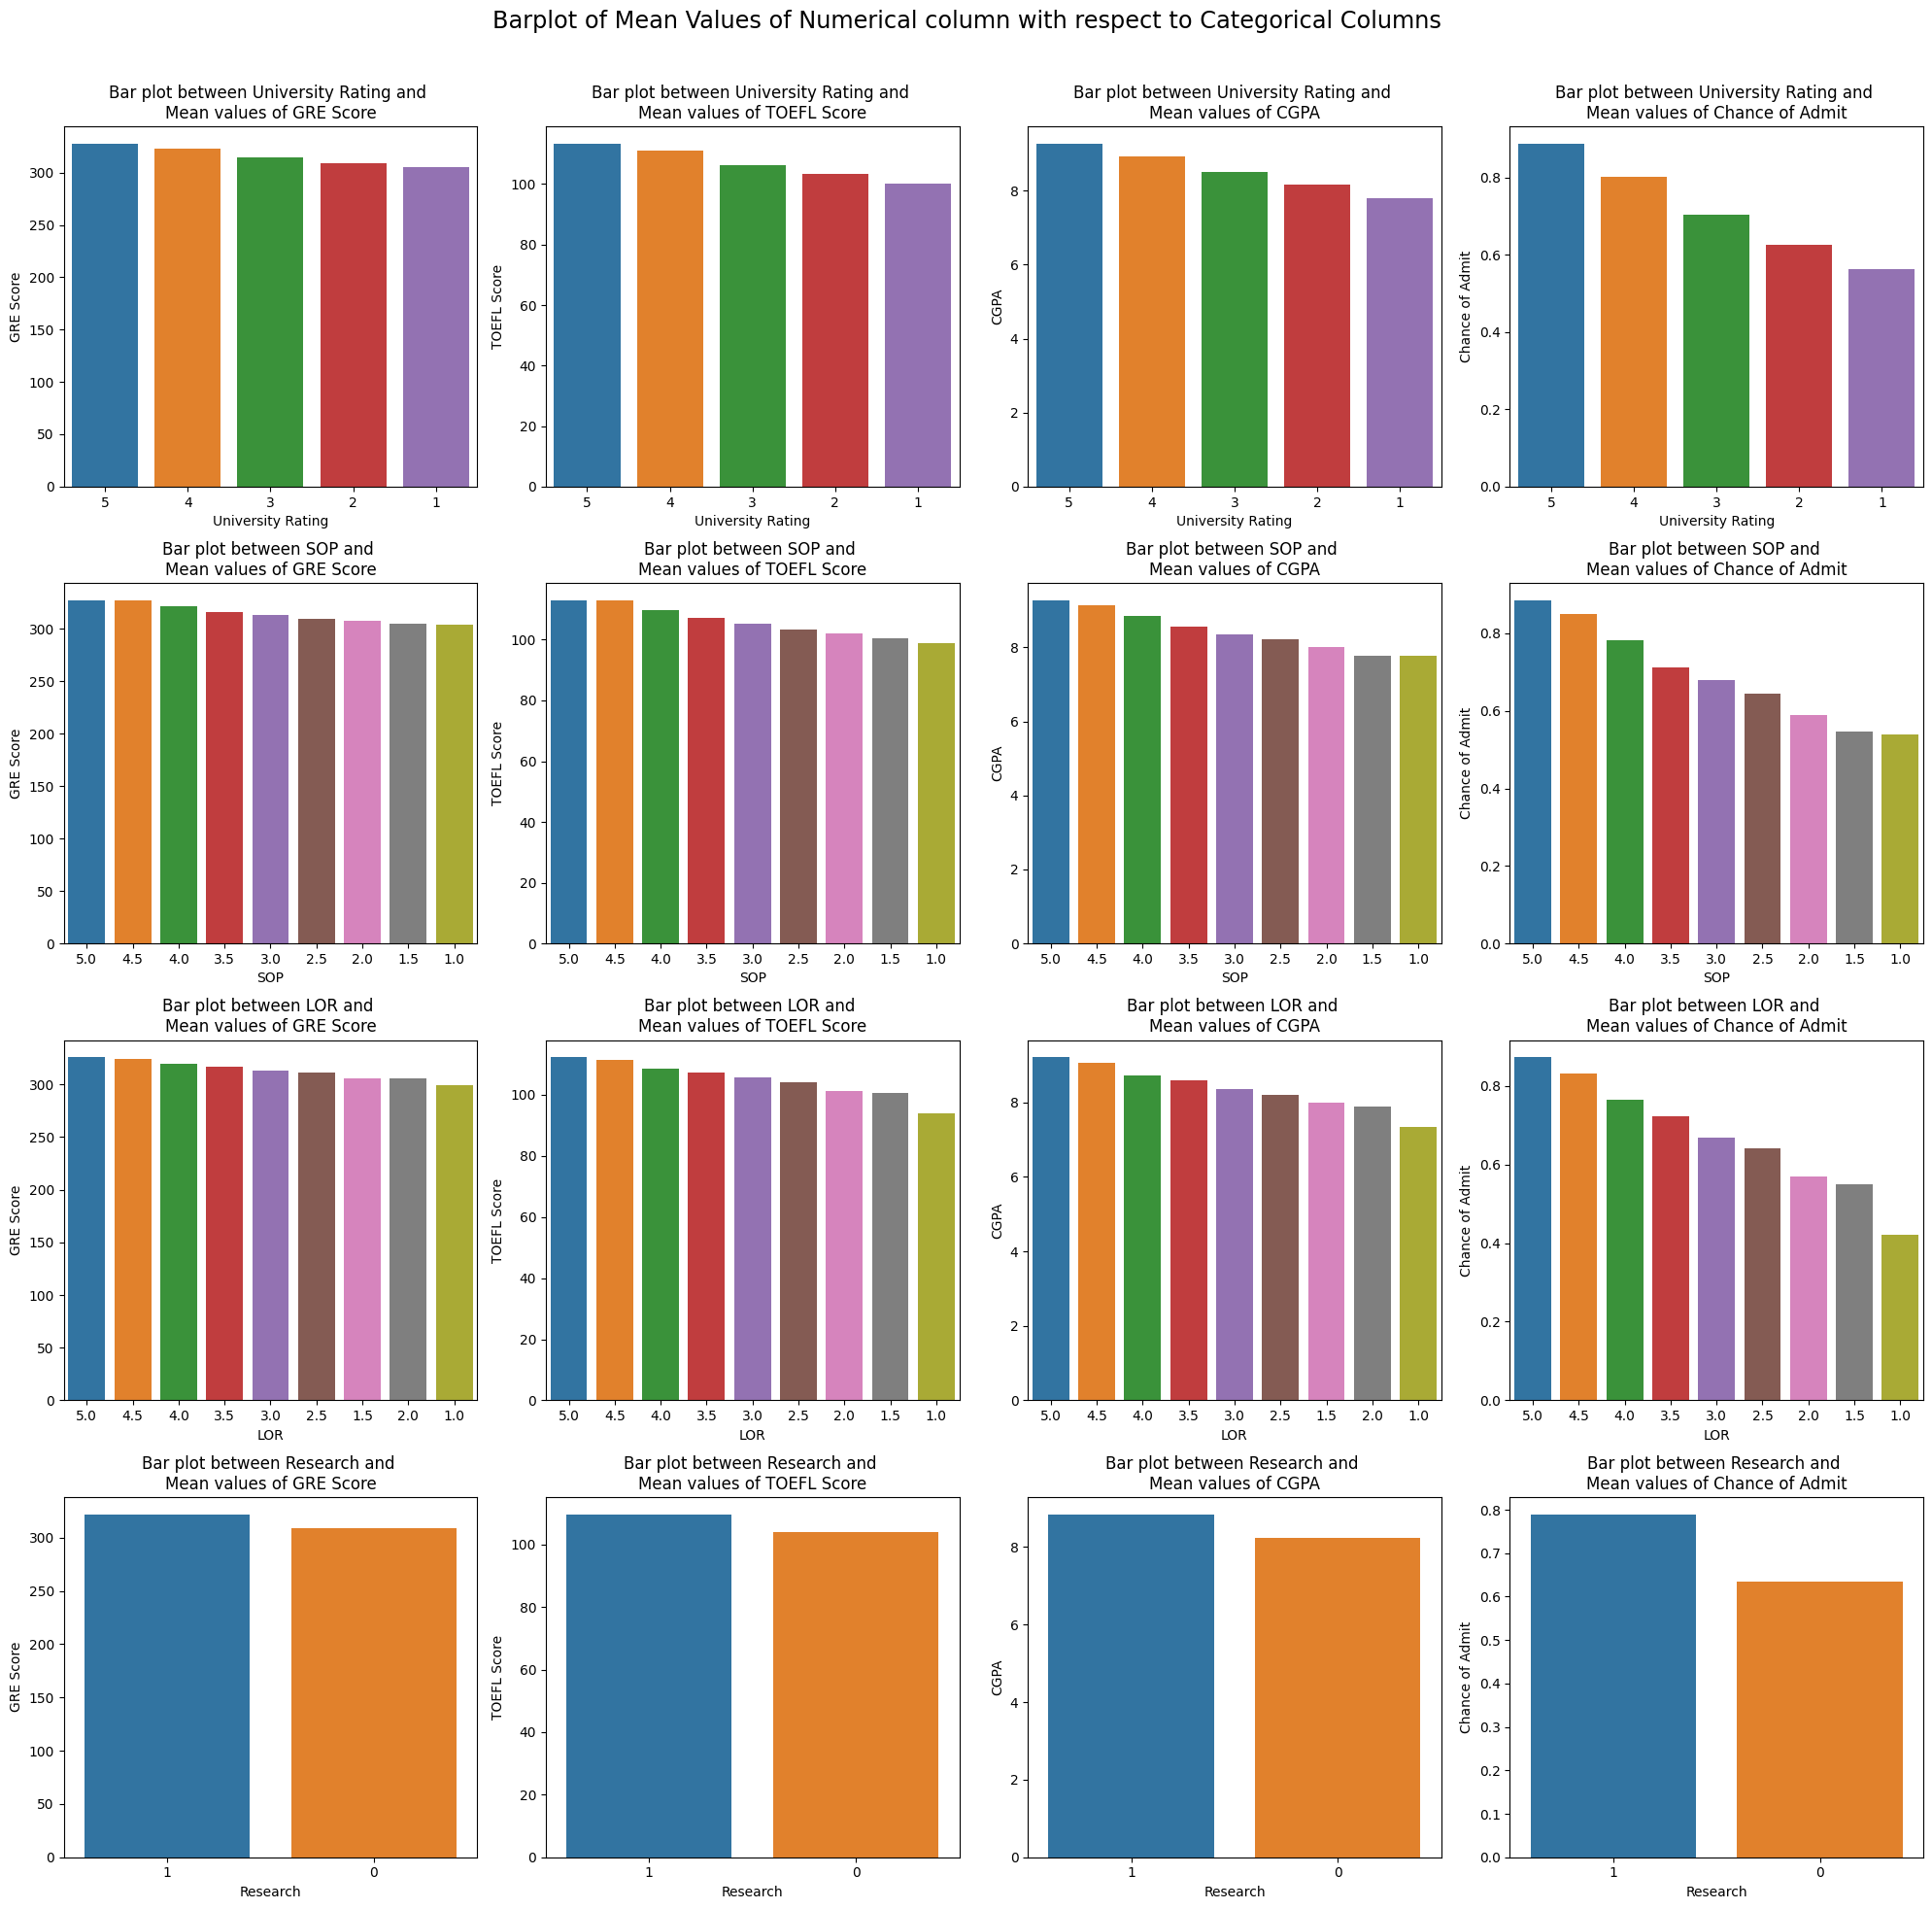

In [724]:
fig = plt.figure(figsize = (20,20))
plt.suptitle("Barplot of Mean Values of Numerical column with respect to Categorical Columns\n",fontsize = "xx-large")
k = 1
for p,q in Cat_Vs_Num:
    plt.subplot(math.ceil(len(Cat_Vs_Num)/4),4,k)
    plt.title(f"Bar plot between {p} and \nMean values of {q}")
    k += 1
    df = pd.DataFrame(jamboree.groupby([p])[[q]].mean().reset_index())
    sns.barplot(data = df,x = p,y= q,order = df.sort_values(q,ascending = False)[p])
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
warnings.filterwarnings('ignore')

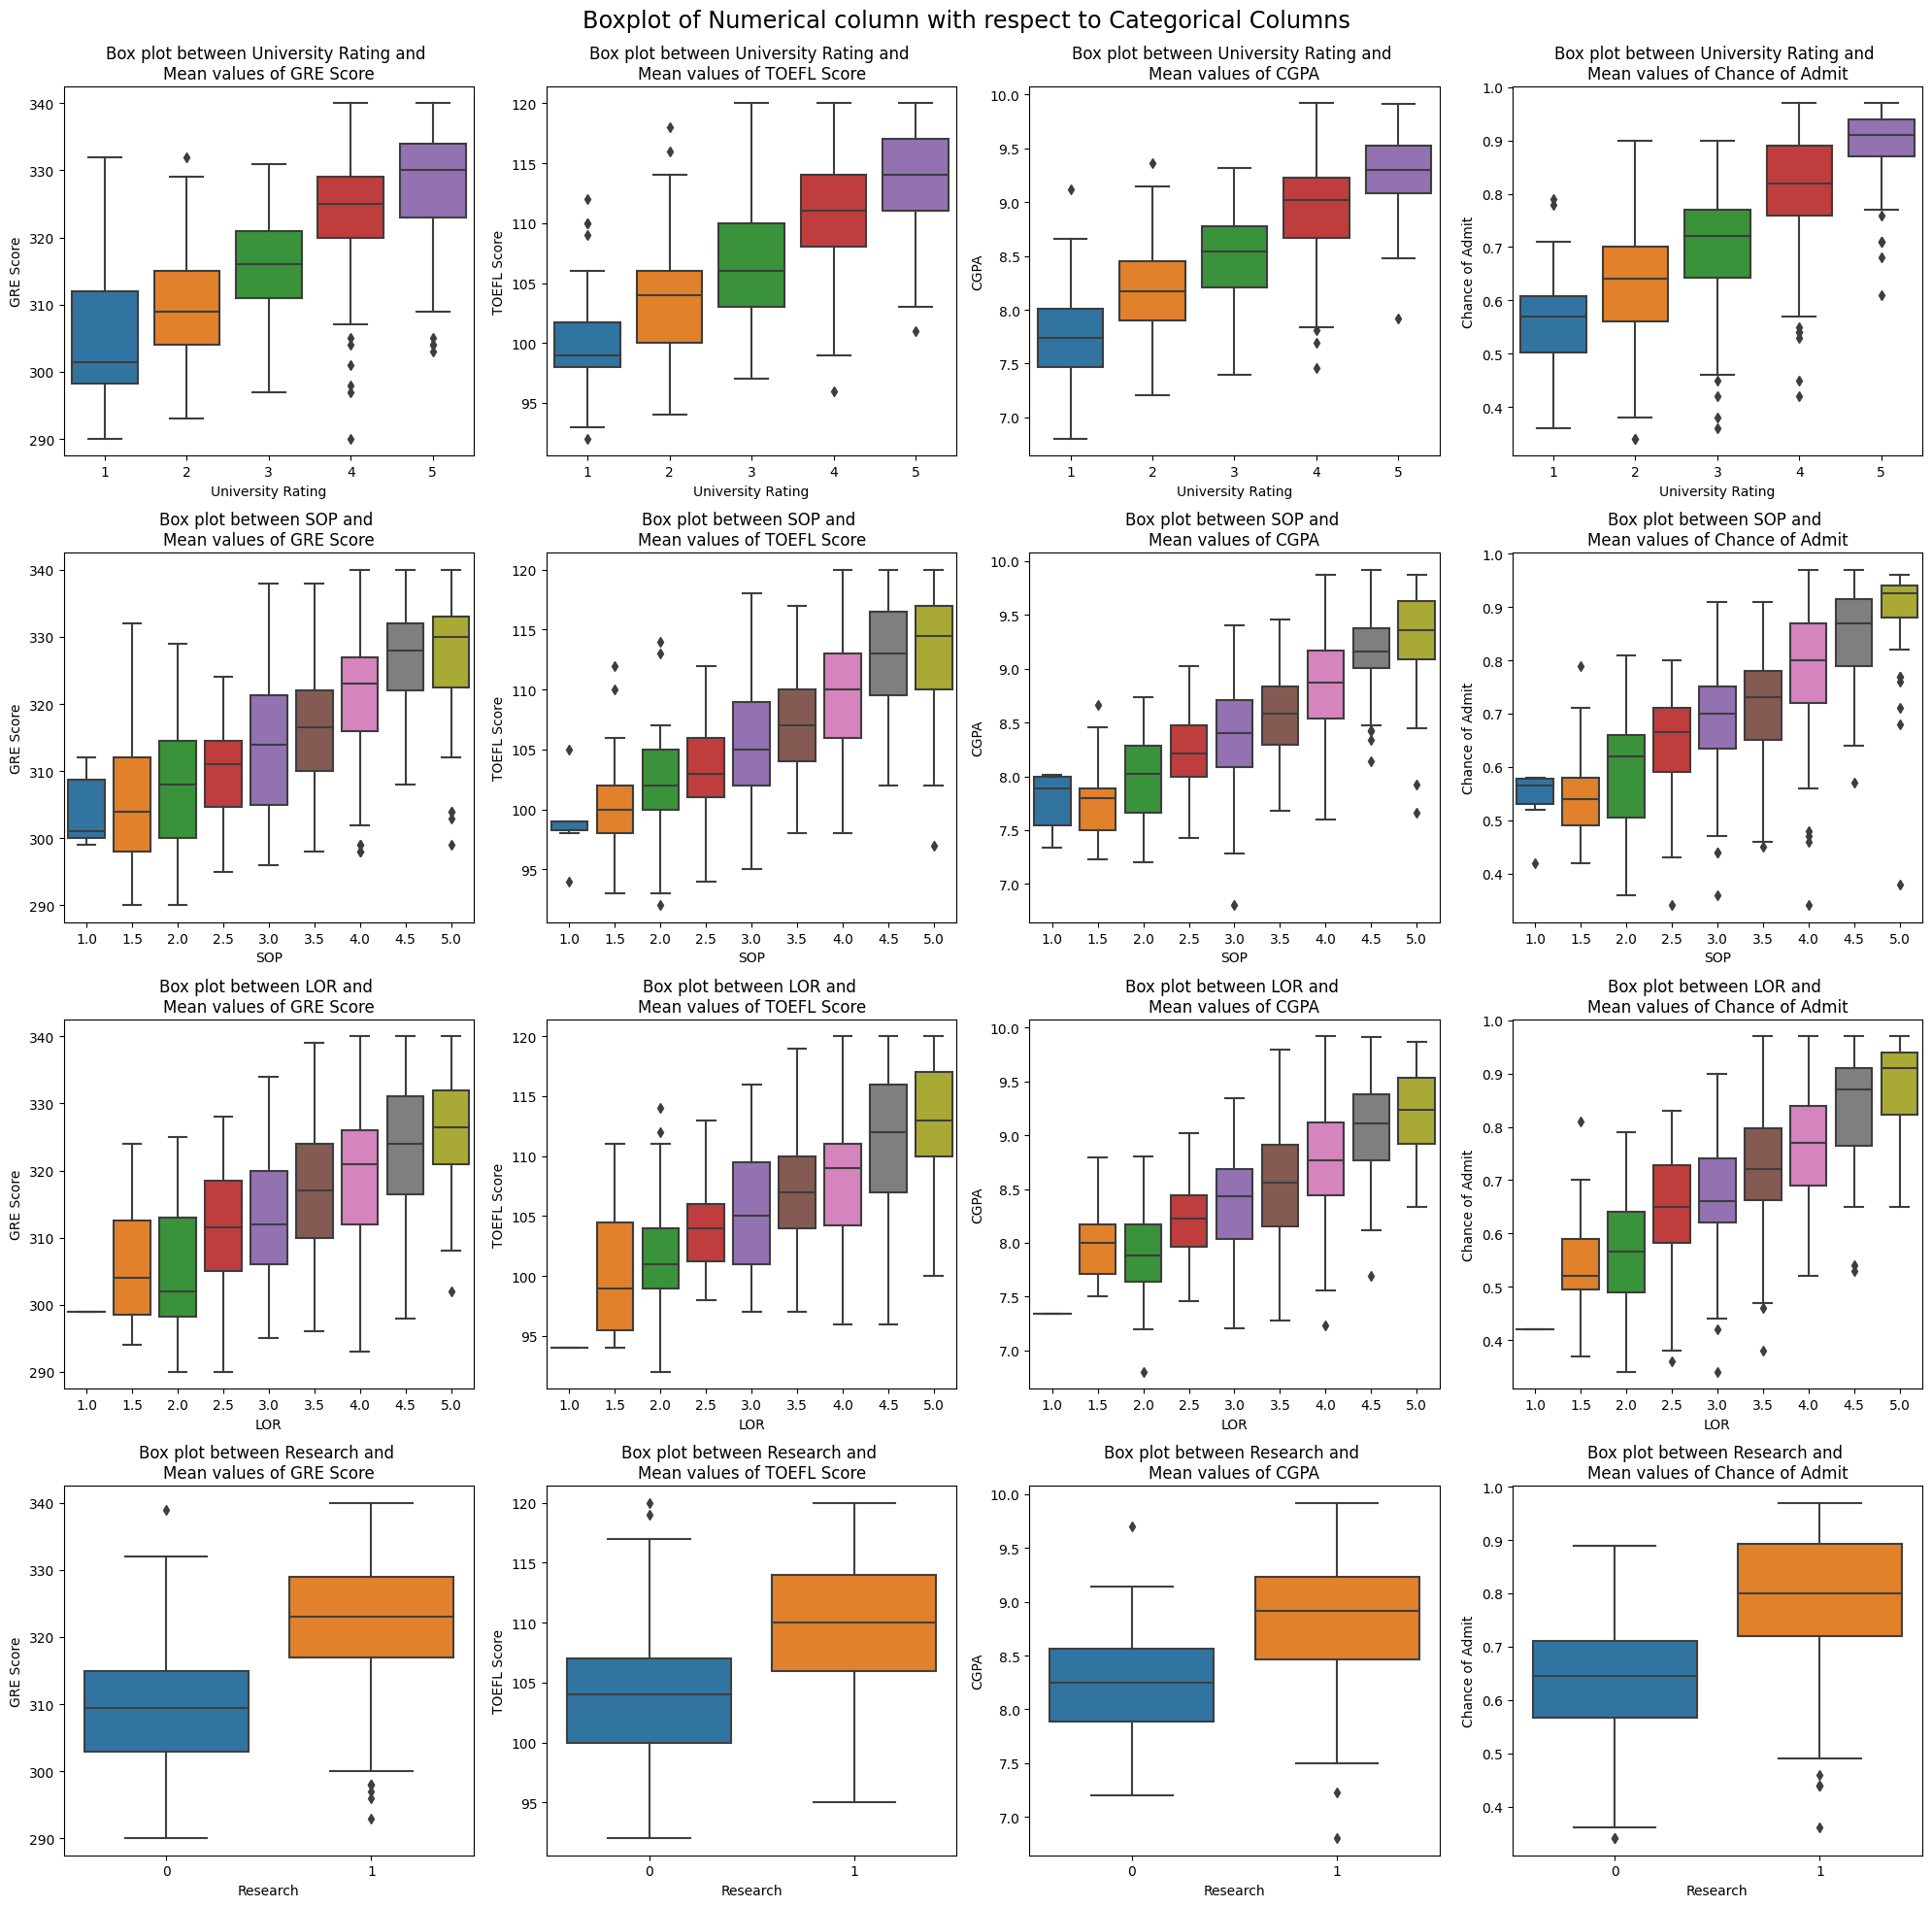

In [725]:
fig = plt.figure(figsize = (20,20))
plt.suptitle("Boxplot of Numerical column with respect to Categorical Columns",fontsize = "xx-large")
k = 1
for p,q in Cat_Vs_Num:
    plt.subplot(math.ceil(len(Cat_Vs_Num)/4),4,k)
    plt.title(f"Box plot between {p} and \nMean values of {q}")
    k += 1
    sns.boxplot(data = jamboree,x = p,y= q)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
warnings.filterwarnings('ignore')

In [726]:
num_perm = list(permutations(num_cols,2))
num_comb = list(combinations(num_cols,2))

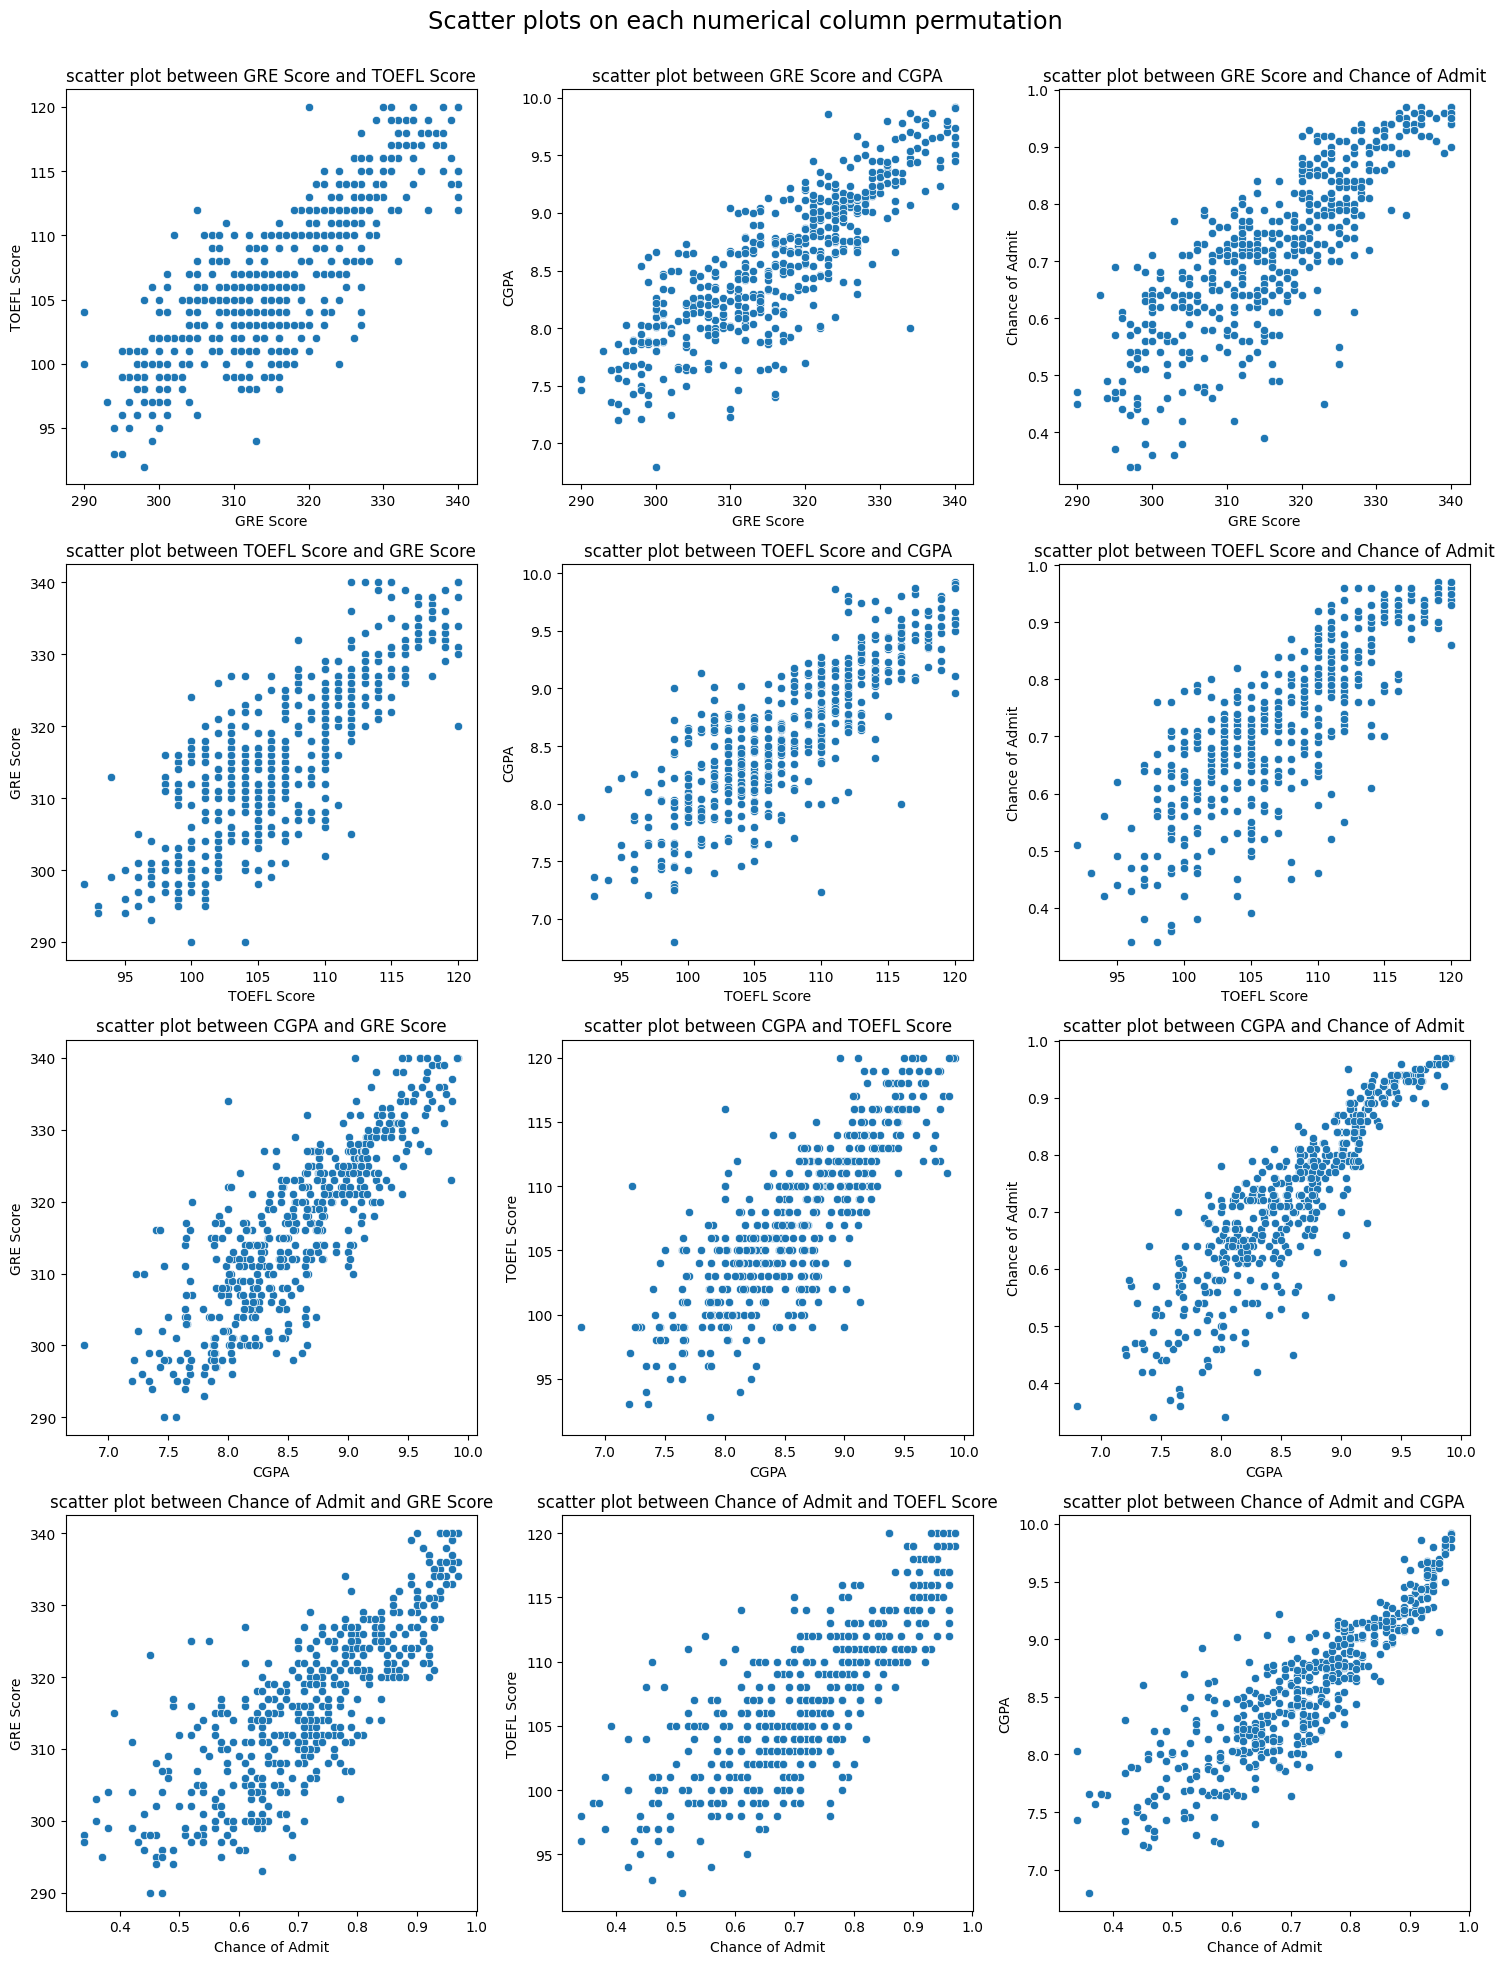

In [727]:
fig = plt.figure(figsize = (15,20))
plt.suptitle("Scatter plots on each numerical column permutation\n",fontsize="xx-large")
k = 1
for p,q in num_perm:
    plt.subplot(math.ceil(len(cat_perm)/3),3,k)
    plt.title(f"scatter plot between {p} and {q}")
    k += 1
    sns.scatterplot(data=jamboree,x=p,y=q)
    warnings.filterwarnings('ignore')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
warnings.filterwarnings('ignore')

In [728]:
#combinations of three in such a way that first two are numerical columns and third is categorical col
Num_Num_Cat = []
for i in range(len(num_comb)):
    for j in range(len(cat_cols)):
        Num_Num_Cat.append(list(num_comb[i])+[cat_cols[j]])
print(Num_Num_Cat)
print(len(Num_Num_Cat))

[['GRE Score', 'TOEFL Score', 'University Rating'], ['GRE Score', 'TOEFL Score', 'SOP'], ['GRE Score', 'TOEFL Score', 'LOR'], ['GRE Score', 'TOEFL Score', 'Research'], ['GRE Score', 'CGPA', 'University Rating'], ['GRE Score', 'CGPA', 'SOP'], ['GRE Score', 'CGPA', 'LOR'], ['GRE Score', 'CGPA', 'Research'], ['GRE Score', 'Chance of Admit', 'University Rating'], ['GRE Score', 'Chance of Admit', 'SOP'], ['GRE Score', 'Chance of Admit', 'LOR'], ['GRE Score', 'Chance of Admit', 'Research'], ['TOEFL Score', 'CGPA', 'University Rating'], ['TOEFL Score', 'CGPA', 'SOP'], ['TOEFL Score', 'CGPA', 'LOR'], ['TOEFL Score', 'CGPA', 'Research'], ['TOEFL Score', 'Chance of Admit', 'University Rating'], ['TOEFL Score', 'Chance of Admit', 'SOP'], ['TOEFL Score', 'Chance of Admit', 'LOR'], ['TOEFL Score', 'Chance of Admit', 'Research'], ['CGPA', 'Chance of Admit', 'University Rating'], ['CGPA', 'Chance of Admit', 'SOP'], ['CGPA', 'Chance of Admit', 'LOR'], ['CGPA', 'Chance of Admit', 'Research']]
24


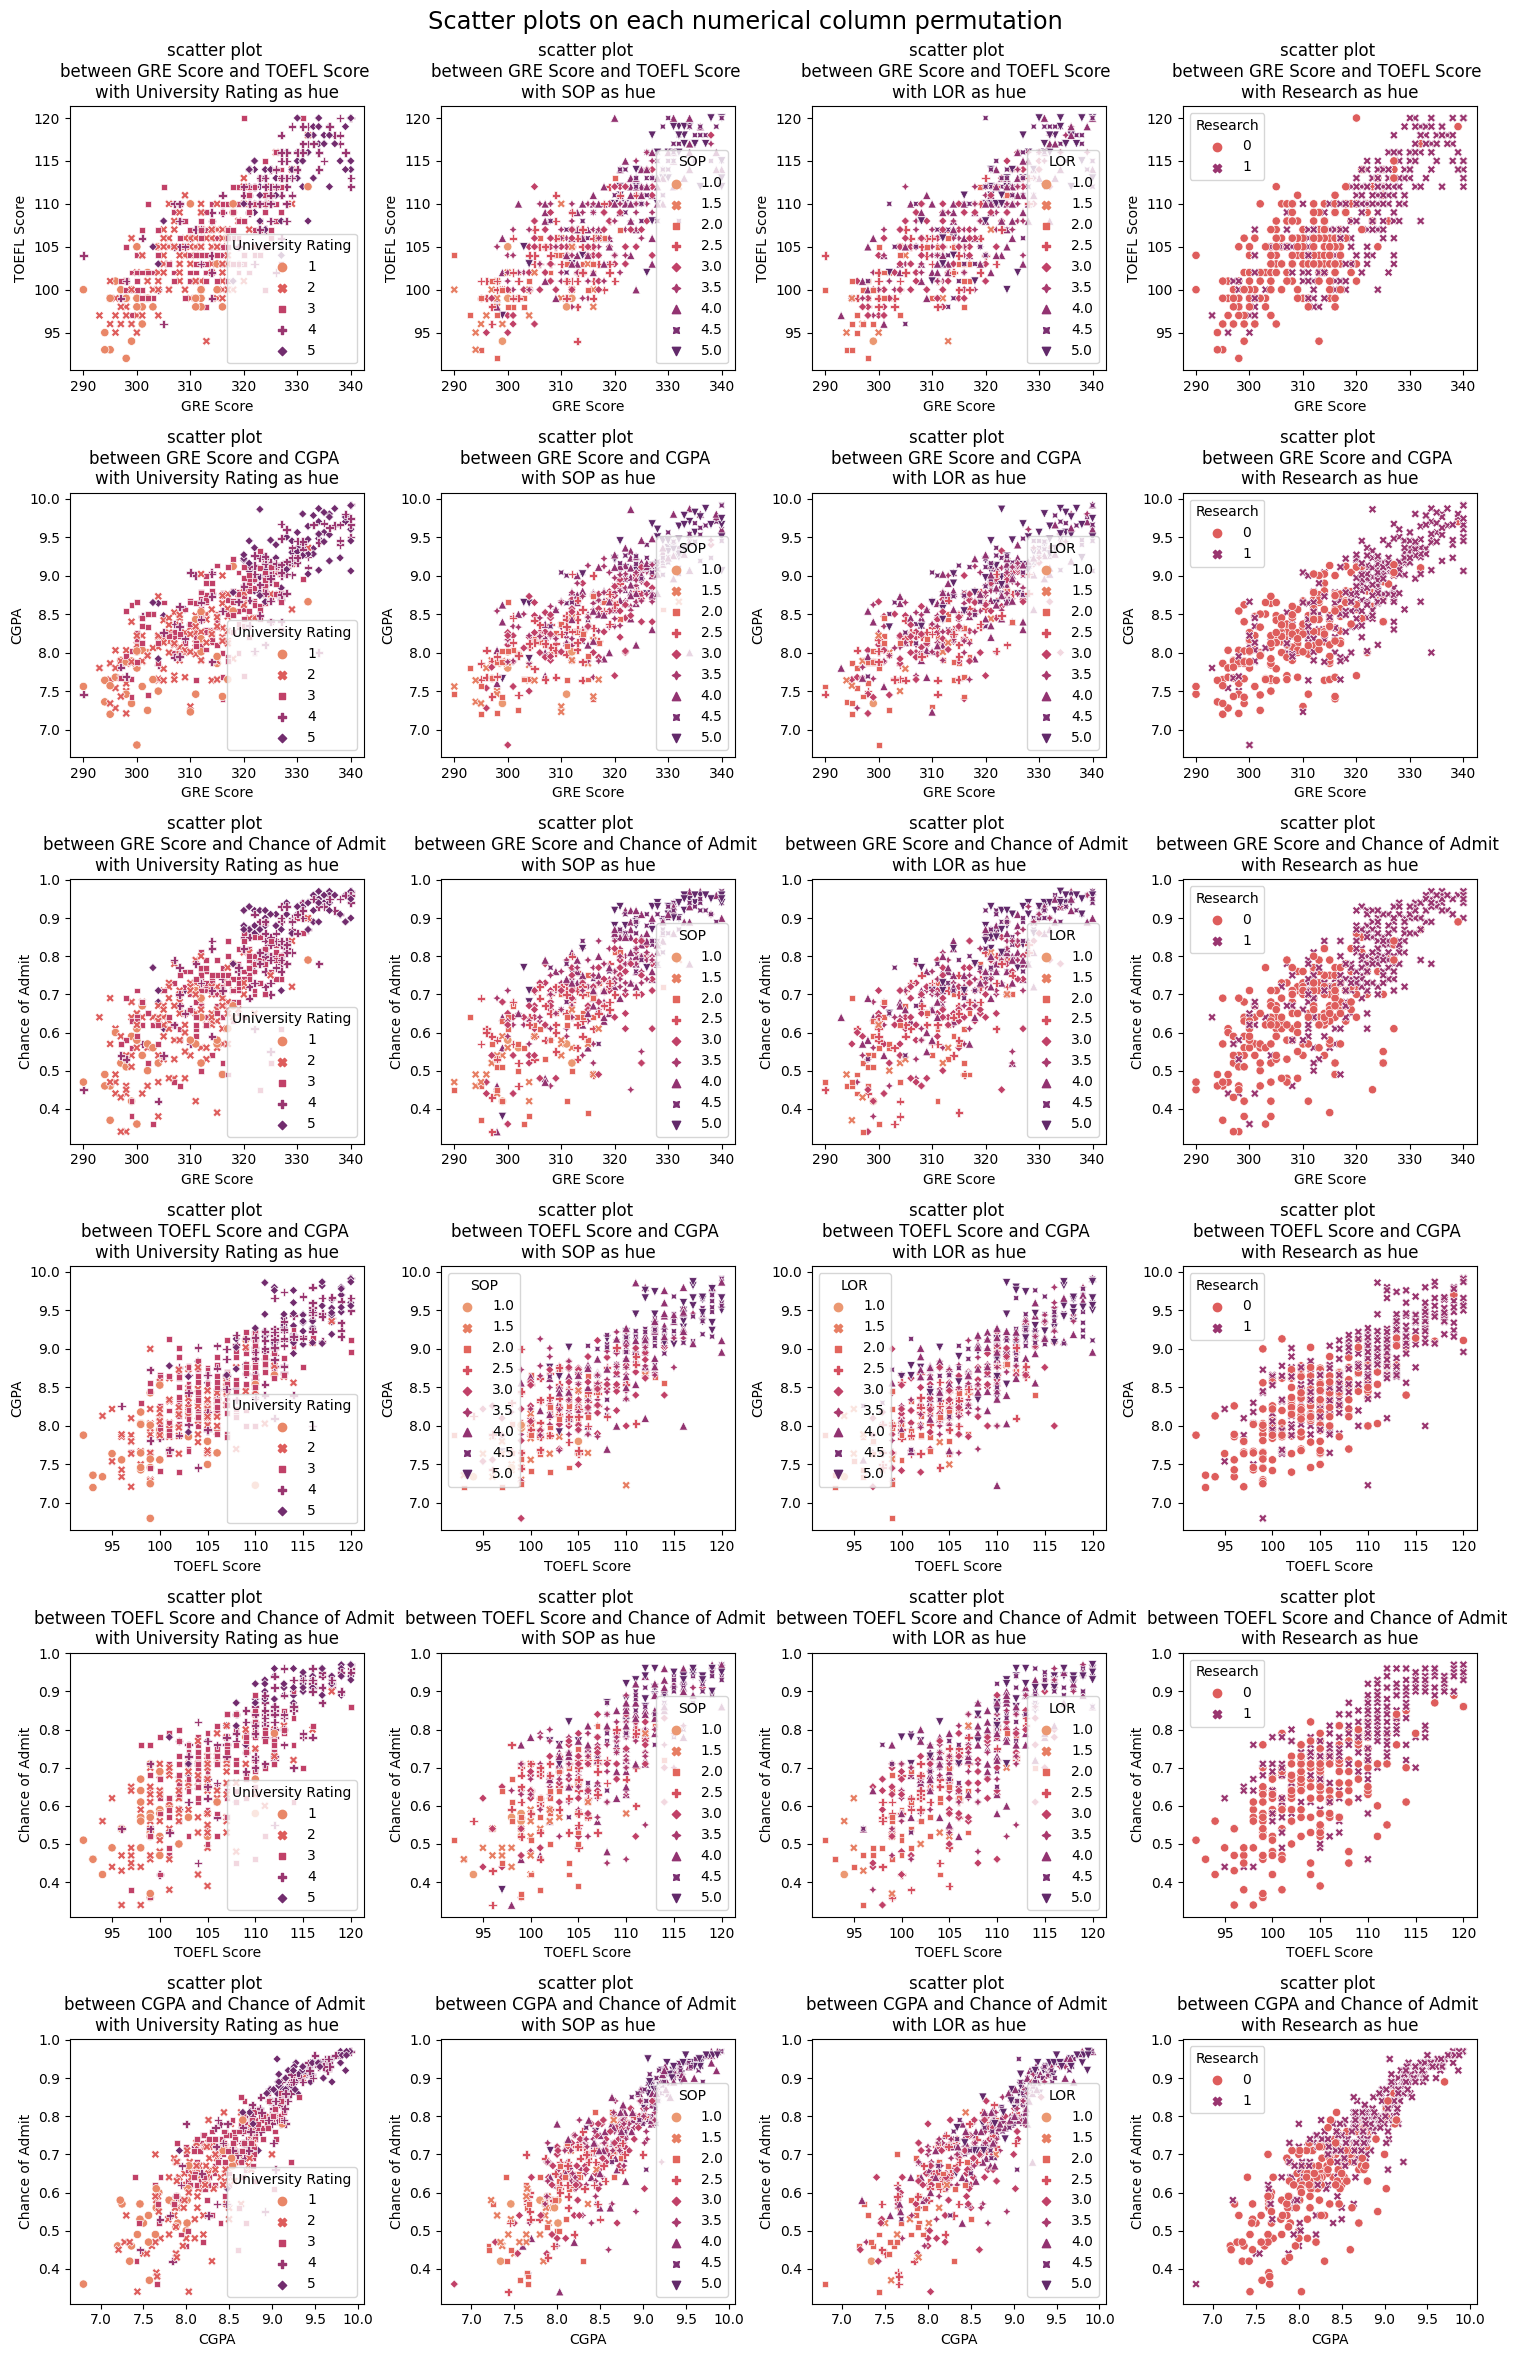

In [729]:
fig = plt.figure(figsize = (15,24))
plt.suptitle("Scatter plots on each numerical column permutation\n",fontsize="xx-large")
k = 1
for p,q,r in Num_Num_Cat:
    plt.subplot(math.ceil(len(Num_Num_Cat)/4),4,k)
    plt.title(f"scatter plot \nbetween {p} and {q} \nwith {r} as hue")
    k += 1
    sns.scatterplot(data=jamboree,x=p,y=q,hue = r,style = r, palette = "flare")
    warnings.filterwarnings('ignore')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
warnings.filterwarnings('ignore')

<Axes: >

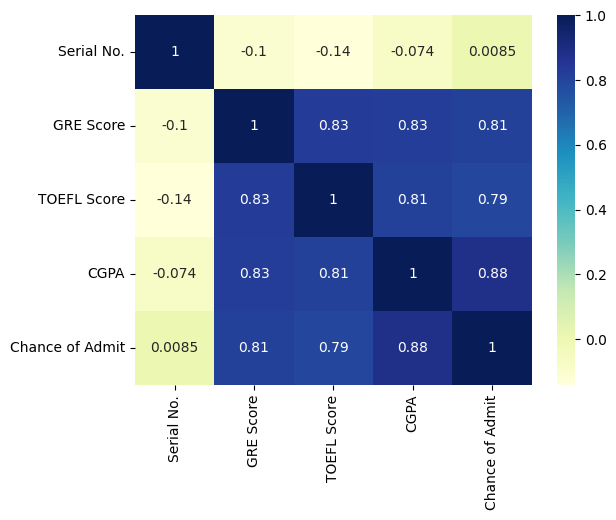

In [730]:
sns.heatmap(jamboree.corr(), cmap="YlGnBu", annot=True)

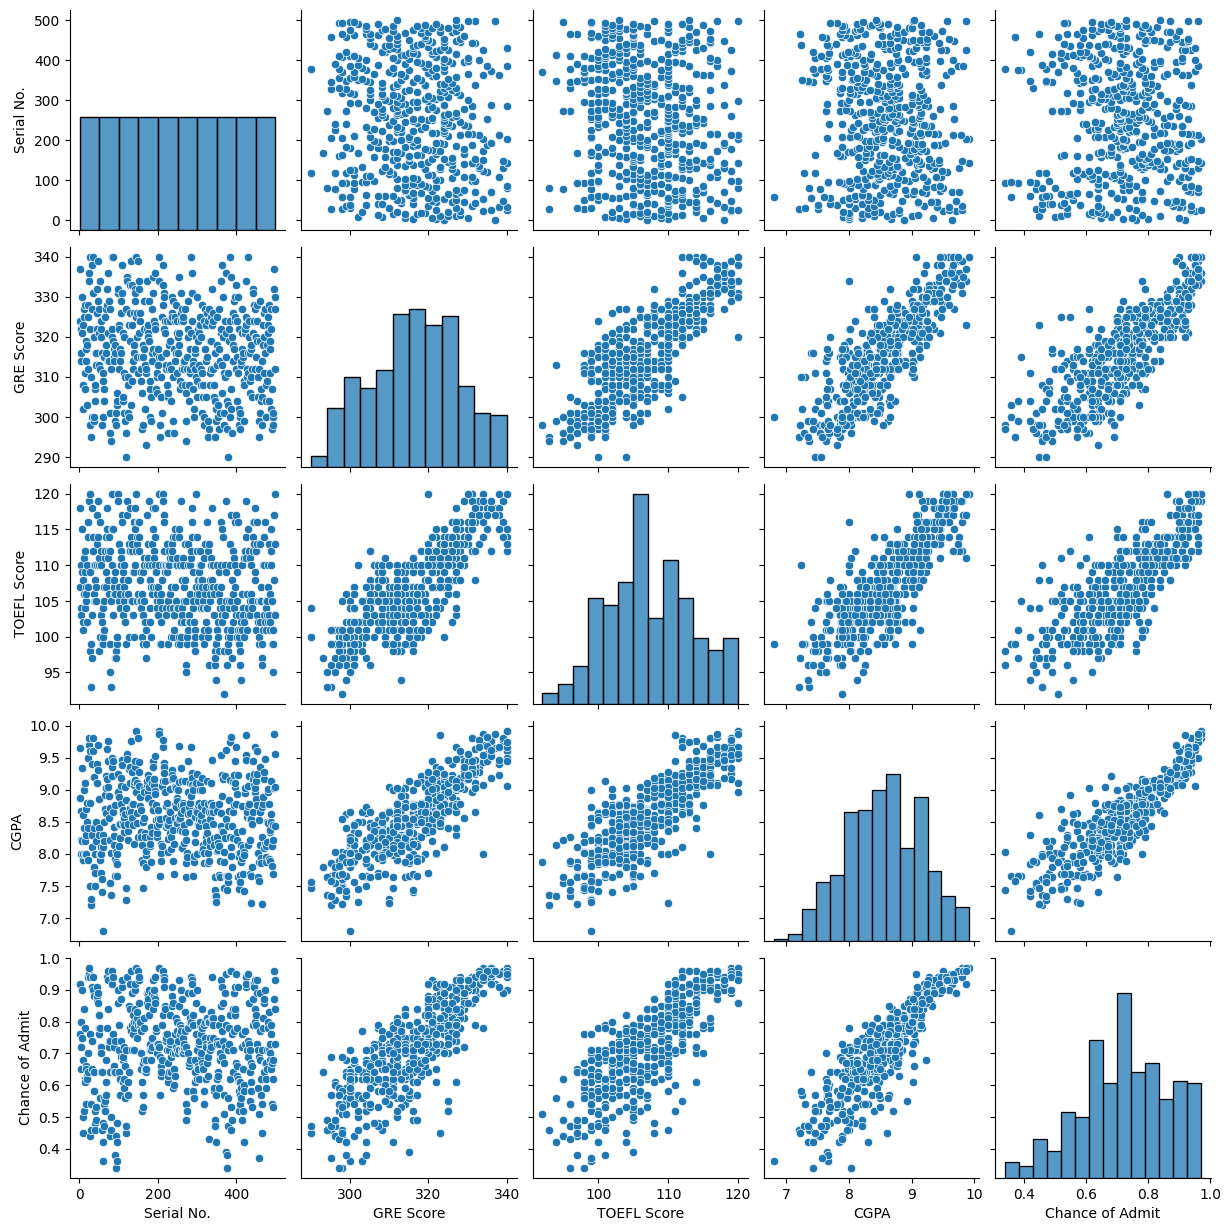

In [731]:
sns.pairplot(data = jamboree)

# CHAPTER 2: DATA PREPROCESSING

## DUPLICATE VALUE CHECK

In [732]:
jamboree.duplicated().sum()

0

> No duplicated rows

## MISSING VALUE TREATMENT

> No Missing values in the data

## OUTLIER TREATMENT

> Very minimal outliers present in the data. So neglecting them.

## FEATURE ENGINEERING

> No need of creating new features.

> All availabe columns act as features

## DATA PREPARATION FOR MODELING

### Separating the Target variable from dataset and delete the Serial Number column from Train dataset

In [733]:
# y is the target variable
y = jamboree["Chance of Admit"]

# X is Feature dataset
X = jamboree.drop(["Serial No.","Chance of Admit"],axis = 1)

# Shape of target and feature datasets
y.shape,X.shape


((500,), (500, 7))

Jamboree has
*  "Chance of Admit" as target variable
*  8 input features

### Splitting the given dataset to Train,test data

using 80:20 ratio to split:
* 80% for training = 400 rows
* 20% for testing = 100 rows

In [734]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [735]:
type(X_test)

pandas.core.frame.DataFrame

In [736]:
X_train.shape, y_train.shape

((400, 7), (400,))

In [737]:
X_test.shape, y_test.shape

((100, 7), (100,))

### Scaling the data

In [738]:
scaler = MinMaxScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [739]:
X_train_scaled.head()

GRE Score  TOEFL Score  University Rating    SOP       LOR      CGPA  \
0       0.40     0.428571                0.5  0.250  0.571429  0.503205   
1       0.56     0.642857                0.0  0.375  0.571429  0.557692   
2       0.20     0.321429                0.5  0.625  0.285714  0.346154   
3       0.20     0.250000                0.0  0.500  0.142857  0.000000   
4       0.64     0.428571                0.5  0.625  0.714286  0.653846   

   Research  
0       0.0  
1       1.0  
2       0.0  
3       1.0  
4       1.0

In [740]:
X_test_scaled.head()

GRE Score  TOEFL Score  University Rating    SOP       LOR      CGPA  \
0       0.46     0.500000               0.25  0.375  0.142857  0.522436   
1       0.44     0.535714               0.50  0.500  0.428571  0.532051   
2       0.98     0.964286               1.00  0.875  0.714286  0.929487   
3       0.52     0.535714               0.25  0.625  0.571429  0.589744   
4       0.70     0.642857               0.75  0.875  0.714286  0.692308   

   Research  
0       0.0  
1       1.0  
2       0.0  
3       1.0  
4       1.0

# CHAPTER 3: MODEL BUILDING

## BUILD THE LINEAR REGRESSION MODEL AND COMMENT ON THE MODEL STATISTICS

In [741]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [742]:
model.coef_

array([0.09161221, 0.08887002, 0.02451543, 0.01202031, 0.05049382,
       0.36411739, 0.01988978])

In [743]:
model.intercept_

0.35899013133207913

> Model intercept is bias value. If we put all weights = 0, y_hat = model intercept. This implies that it is the intersection of hyperplane with the y_hat axis.

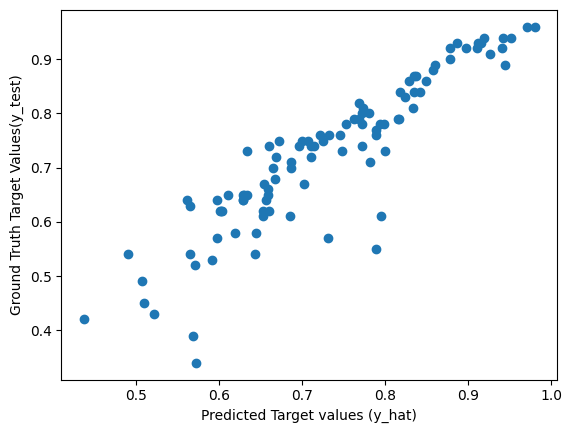

In [744]:
fig = plt.figure()
y_hat = model.predict(X_test_scaled)
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

In [745]:
def mean_absolute_error(y_test, y_hat):
    return np.mean(np.abs(y_test - y_hat))

def mean_squared_error(y_test, y_hat):
    return np.mean((y_test - y_hat)**2)

def root_mean_squared_error(y_test, y_hat):
    return np.sqrt(mean_squared_error(y_test, y_hat))

def r2_score(y_test, y_hat):
    ss_residual = np.sum((y_test - y_hat)**2)
    ss_total = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def adjusted_r2_score(r2, n_samples, n_features):
    adj_r2 = 1 - (((1 - r2) * (n_samples - 1)) / (n_samples - n_features - 1))
    return adj_r2

mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test), len(X_test.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.040200193804157944
Mean Squared Error: 0.0034590988971363824
Root Mean Squared Error: 0.05881410457650769
R-squared Score: 0.8208741703103732
Adjusted R-squared Score: 0.8072450310948581


> General Linear Regression model uses Ordinary Least Squares method to fit the weights to given dataset

## DISPLAY MODEL COEFFICIENTS WITH COLUMN NAMES

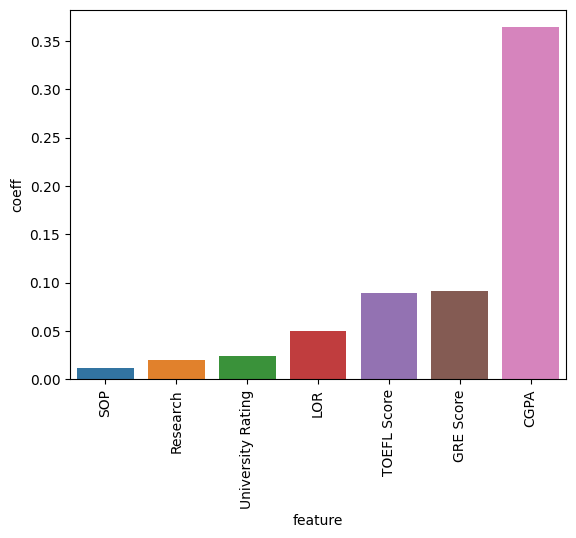

In [746]:
feature_coeff = pd.DataFrame(list(zip(X_train_scaled.columns,model.coef_)),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=feature_coeff,order = feature_coeff.sort_values("coeff").feature)
plt.xticks(rotation=90)
plt.show()

> CGPA has highest coeffcient implies that CGPA feature has more importance.

> SOP has lowest coeffcient implies that SOP feature has less importance 

## TRY OUT RIDGE AND LASSO REGRESSION

### L1 Regularisation or Lasso Regression

In [747]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.001)

In [748]:
print(lasso.coef_)

[0.08963466 0.08455098 0.02802097 0.0094516  0.04769436 0.34232003
 0.02173095]


In [749]:
print(lasso.intercept_)

0.37500346903568066


In [750]:
y_hat = lasso.predict(X_test_scaled)

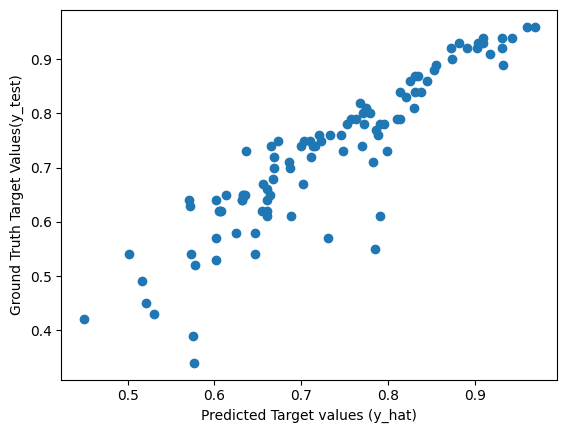

In [751]:
fig = plt.figure()
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

In [752]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test), len(X_test.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.04057015310599113
Mean Squared Error: 0.003505640777196343
Root Mean Squared Error: 0.0592084519067704
R-squared Score: 0.8184640475792894
Adjusted R-squared Score: 0.8046515294603223


### L2 Regularisation or Ridge Regression

In [753]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled,y_train)

Ridge()

In [754]:
ridge.coef_

array([0.1084213 , 0.09997178, 0.03160706, 0.02311355, 0.05562673,
       0.29302587, 0.02197611])

In [755]:
ridge.intercept_

0.3701847983439584

In [756]:
y_hat = ridge.predict(X_test_scaled)

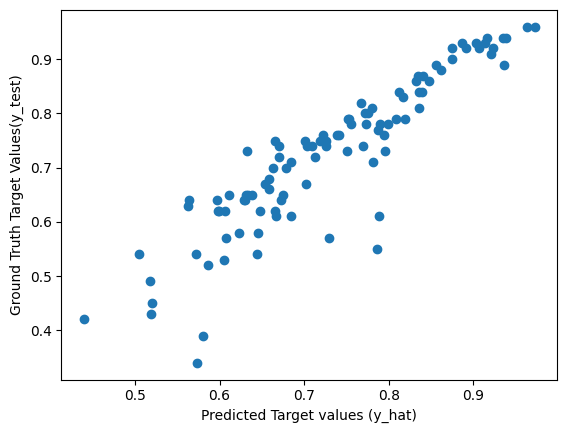

In [757]:
fig = plt.figure()
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

In [758]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test), len(X_test.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.04093430970906569
Mean Squared Error: 0.003526280548973887
Root Mean Squared Error: 0.05938249362374307
R-squared Score: 0.8173952385182597
Adjusted R-squared Score: 0.8035013979707359


### Elastic net regularisation

In [759]:
elasticnet = ElasticNet(alpha = 0.001)
elasticnet.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.001)

In [760]:
elasticnet.coef_

array([0.09524095, 0.0896154 , 0.02779894, 0.01343073, 0.05038349,
       0.33579987, 0.02121245])

In [761]:
elasticnet.intercept_

0.36954114253282005

In [762]:
y_hat = elasticnet.predict(X_test_scaled)

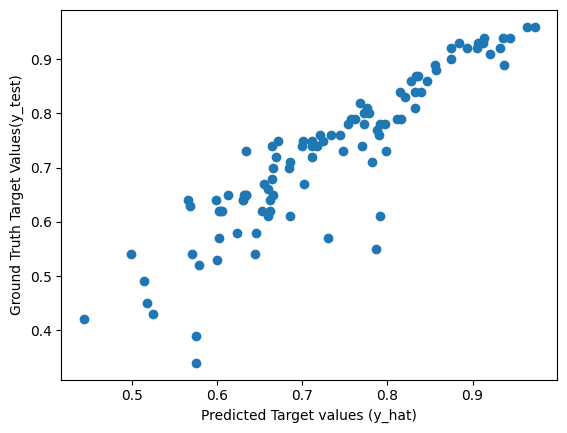

In [763]:
fig = plt.figure()
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

In [764]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test), len(X_test.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.04053178187336964
Mean Squared Error: 0.0034899612318198443
Root Mean Squared Error: 0.05907589383005427
R-squared Score: 0.8192759964880201
Adjusted R-squared Score: 0.8055252570903695


> As there is no overfitting, Evaluation metrics of Normal Linear Regression model, Lasso Regression model, Ridge Regression model and Elastic Net model are almost similar.
 

# CHAPTER 4: TESTING THE ASSUMPTIONS OF THE LINEAR REGRESSION MODEL ** 

## MULTI-COLLINEARITY CHECK BY VIF SCORE (VARIABLES ARE DROPPED ONE BY ONE TILL NONE HAS VIF>5)

Statsmodel implementation of Linear Regression

In [765]:
X_train_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_train_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.10e-142
Time:                        00:07:56   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2887      0.11

When one or more input variables exhibit strong correlation, One among them is enough to be part of the model

In [766]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0          GRE Score  1371.11
1        TOEFL Score  1266.69
5               CGPA   941.67
3                SOP    34.73
4                LOR    30.89
2  University Rating    21.45
6           Research     2.80

Removing the variable with highest VIF

In [767]:
cols = vif["Features"][1:].values
X_train_2 = X_train[cols]

X_train_2_sm = sm.add_constant(X_train_2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     292.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.49e-141
Time:                        00:07:56   Log-Likelihood:                 554.32
No. Observations:                 400   AIC:                            -1095.
Df Residuals:                     393   BIC:                            -1067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9933      0.07

In [768]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1               CGPA  721.92
0        TOEFL Score  641.91
2                SOP   32.93
3                LOR   30.59
4  University Rating   20.59
5           Research    2.78

Lets try removing one more variable

In [769]:
cols = vif["Features"][1:].values
X_train_3 = X_train[cols]

X_train_3_sm = sm.add_constant(X_train_3)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_3_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     225.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.30e-113
Time:                        00:07:56   Log-Likelihood:                 484.62
No. Observations:                 400   AIC:                            -957.2
Df Residuals:                     394   BIC:                            -933.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6820      0.08

In [770]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                SOP  32.54
2                LOR  29.70
0        TOEFL Score  21.10
3  University Rating  20.48
4           Research   2.77

Lets try removing One more variable

In [771]:
cols = vif["Features"][1:].values
X_train_4 = X_train[cols]

X_train_4_sm = sm.add_constant(X_train_4)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_4_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     277.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.54e-113
Time:                        00:07:56   Log-Likelihood:                 482.22
No. Observations:                 400   AIC:                            -954.4
Df Residuals:                     395   BIC:                            -934.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7130      0.08

In [772]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                LOR  25.88
1        TOEFL Score  19.27
2  University Rating  15.30
3           Research   2.75

In [773]:
cols = vif["Features"][1:].values
X_train_5 = X_train[cols]

X_train_5_sm = sm.add_constant(X_train_5)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_5_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     332.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.08e-107
Time:                        00:07:56   Log-Likelihood:                 466.04
No. Observations:                 400   AIC:                            -924.1
Df Residuals:                     396   BIC:                            -908.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7632      0.08

In [774]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  University Rating  11.55
0        TOEFL Score   9.98
2           Research   2.75

In [775]:
cols = vif["Features"][1:].values
X_train_6 = X_train[cols]

X_train_6_sm = sm.add_constant(X_train_6)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_6_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     414.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           5.66e-98
Time:                        00:07:56   Log-Likelihood:                 440.24
No. Observations:                 400   AIC:                            -874.5
Df Residuals:                     397   BIC:                            -862.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0546      0.078    -13.592      

In [776]:
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  TOEFL Score  2.37
1     Research  2.37

Lets use Regularisation on modified dataset

In [777]:
X = jamboree[['TOEFL Score', 'Research']]
y = jamboree["Chance of Admit"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=1)

In [778]:
X_test_m = pd.DataFrame(X_test_m)

Lasso Coefficients are: [0.43490898 0.05500989]
Lasso intercept is: 0.4541667753121399


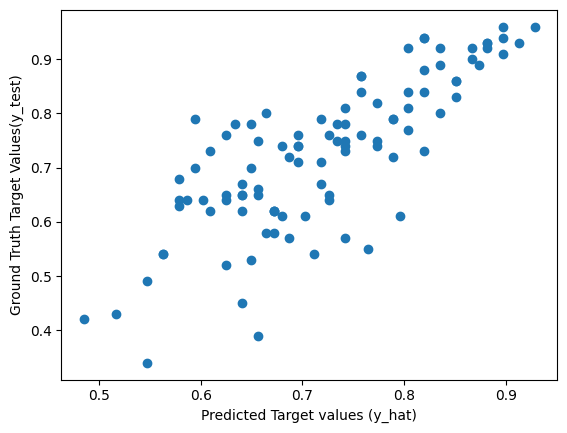

In [779]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_m,y_train_m)
print("Lasso Coefficients are:",lasso.coef_)
print("Lasso intercept is:",lasso.intercept_)
y_hat = lasso.predict(X_test_m)
fig = plt.figure()
plt.scatter(y_hat,y_test_m)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

In [780]:
mae = mean_absolute_error(y_test_m, y_hat)
mse = mean_squared_error(y_test_m, y_hat)
rmse = root_mean_squared_error(y_test_m, y_hat)
r2 = r2_score(y_test_m, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test_m), len(X_test_m.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.0652676258742749
Mean Squared Error: 0.007266123004342548
Root Mean Squared Error: 0.08524155679211019
R-squared Score: 0.6237313963884549
Adjusted R-squared Score: 0.6159732808500724


> Clearly The R2 Score and Adjusted R2 Score are decreasing because of deletion of the features due to VIF>5.

> So it is not good to delete the features as Higher R2 Score indicates the Better model

> Regularisation techniques, Feature Engineering or handling, Dimensionality Reduction or Collecting More data can mitigate the multi collinearity problem 

## LINEARITY OF VARIABLES (NO PATTERN IN THE RESIDUAL PLOT)

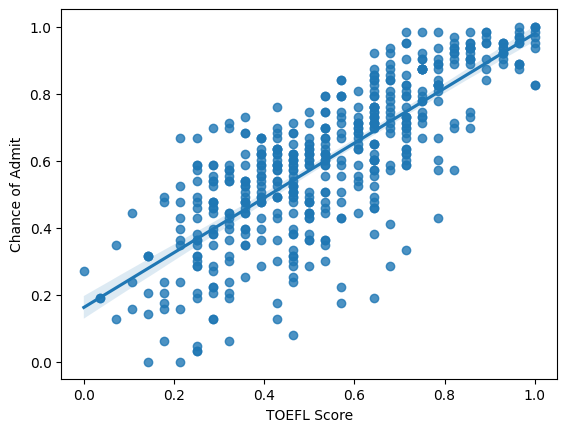

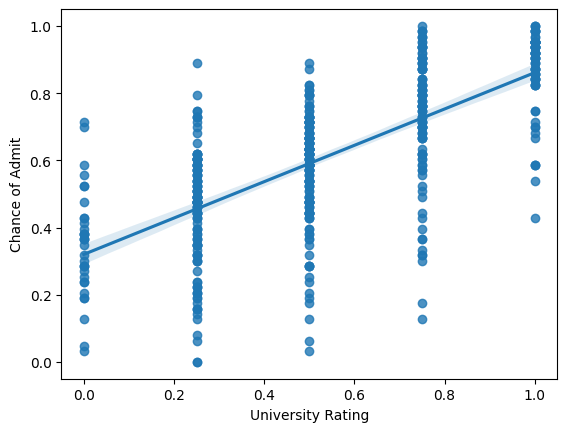

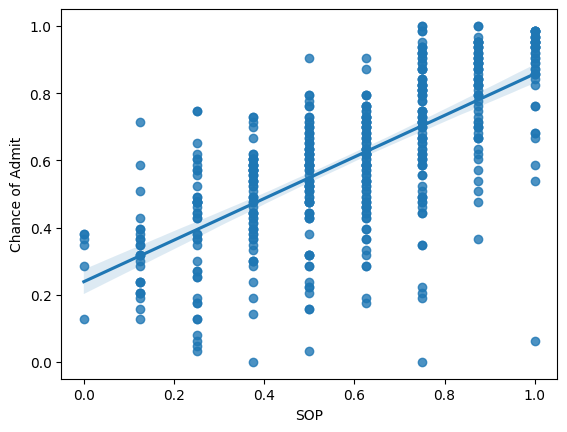

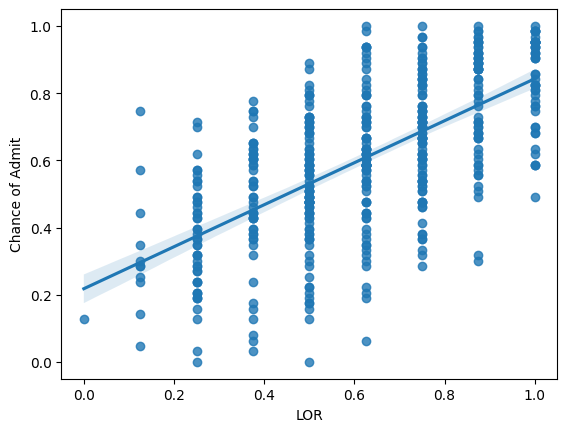

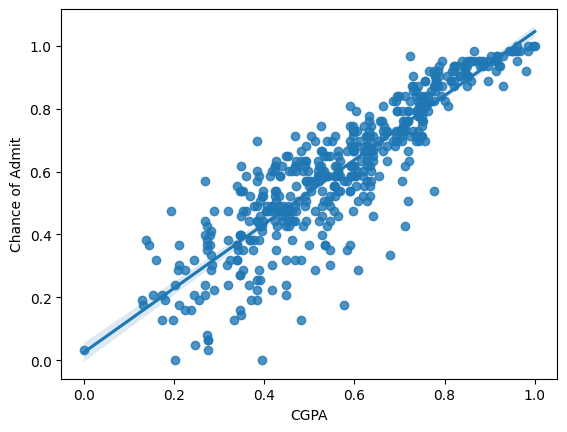

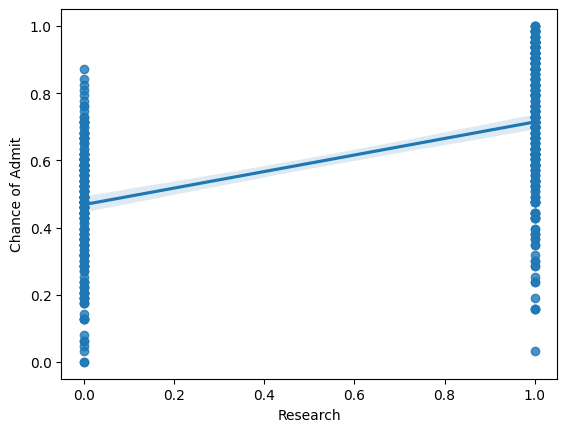

In [802]:
for i in jamboree_scaled.columns[2:-1]:
    sns.regplot(x = i,y ="Chance of Admit",data = jamboree_scaled)
    plt.show()

> Almost all the features are have Linear dependent on Target Variable

## NORMALITY OF RESIDUALS (ALMOST BELL SHAPED CURVE IN RESIDUALS DISTRIBUTION, POINTS IN QQ PLOT ARE ALMOST ALL ON THE TIME)

In [781]:
scaler = MinMaxScaler()
jamboree_scaled = pd.DataFrame(scaler.fit_transform(jamboree),columns = jamboree.columns)
y = jamboree_scaled["Chance of Admit"]
X = jamboree_scaled.drop(["Serial No.","Chance of Admit"],axis = 1)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,y,test_size = 0.2, random_state = 1)
X_train_sm_new = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train_new, X_train_sm_new).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.10e-142
Time:                        00:08:19   Log-Likelihood:                 374.46
No. Observations:                 400   AIC:                            -732.9
Df Residuals:                     392   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0187      0.01

In [783]:
y_hat = sm_model.predict(X_train_sm_new)
errors = y_hat - y_train_new

Text(0.5, 1.0, 'Histogram of residuals')

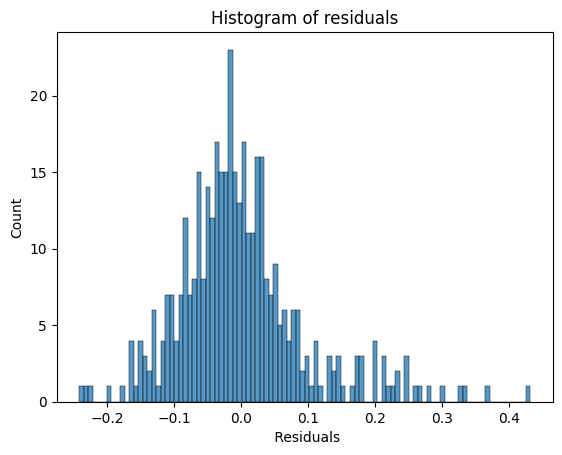

In [785]:
sns.histplot(errors,bins = 100)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

QQ plot of errors

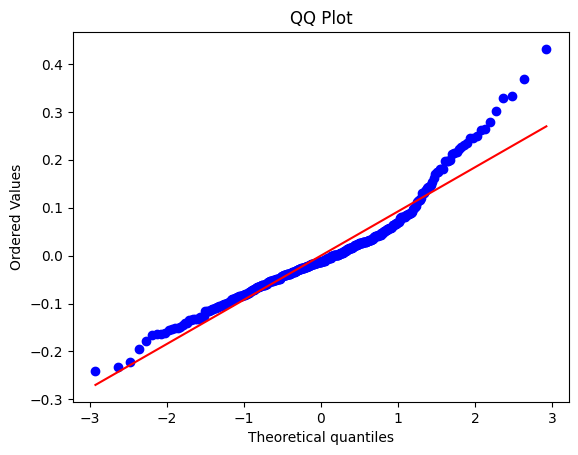

In [788]:
stats.probplot(errors, plot=plt)
plt.title("QQ Plot")
plt.show()

## TEST FOR HOMOSCEDASTICITY

Text(0.5, 1.0, 'Predicted values vs Residuals')

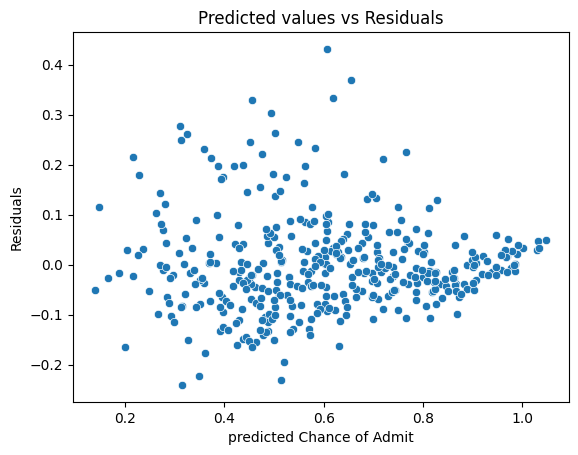

In [790]:
sns.scatterplot(x=y_hat,y=errors)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

> Since the plot is not creating a cone type of shape, Hence there is no homoscedasticity present in the data

## THE MEAN OF RESIDUALS IS NEARLY ZERO

In [792]:
np.mean(errors)

7.216449660063518e-16

> Mean of residuals is very near to zero

# CHAPTER 5: MODEL PERFORMANCE EVALUATION

## METRICS CHECKED - MAE, RMSE, R2, Adj R2

In [803]:
elasticnet = ElasticNet(alpha = 0.001)
elasticnet.fit(X_train_scaled,y_train)
y_hat = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
adj_r2 = adjusted_r2_score(r2, len(X_test), len(X_test.columns))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)

Mean Absolute Error: 0.04053178187336964
Mean Squared Error: 0.0034899612318198443
Root Mean Squared Error: 0.05907589383005427
R-squared Score: 0.8192759964880201
Adjusted R-squared Score: 0.8055252570903695


## TRAIN AND TEST PERFORMANCES ARE CHECKED

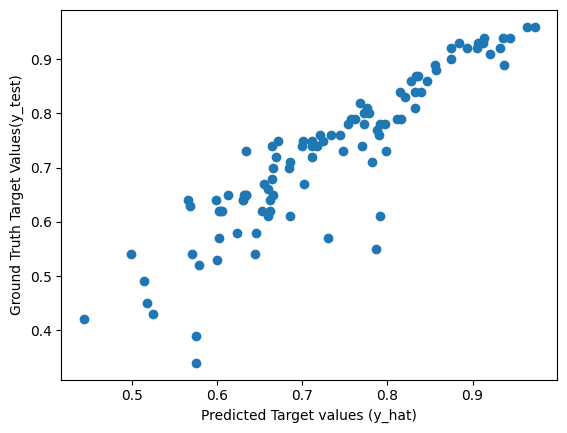

In [804]:
fig = plt.figure()
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Target values (y_hat)")
plt.ylabel("Ground Truth Target Values(y_test)")
plt.show()

## COMMENTS ON THE PERFORMANCES MEASURES AND IF THERE IS ANY NEED TO IMPROVE THE MODEL OR NOT

> elastic net provides best R square score and adjusted R square score. 

> No need to delete the features due to multicollinearity as they are decreasing the R2 square 

# CHAPTER 6: ACTIONABLE INSIGHTS & RECOMMENDATIONS

## INSIGHTS

> CGPA is highest important feature according to weights

> SOP is least important feature according to weights

> On deletion of Features due to VIF, Lastly remained features are TOEFL score and Research. This implies that these two feature independent and very important in predicting the target variable 

## RECOMMENDATIONS

> Multicollinearity present in the data. So It should be handled by increasing the data

> Deleting the features reduces the R2 square values. So it is not preferable.

> All independent variables are linearly correlated with dependent variable

> TOEFL Score and REsearch are two important variables which are important in making the prediction

> Following are best Evaluation metrics

Mean Absolute Error: 0.04053178187336964
Mean Squared Error: 0.0034899612318198443
Root Mean Squared Error: 0.05907589383005427
R-squared Score: 0.8192759964880201
Adjusted R-squared Score: 0.8055252570903695